In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load CSV

In [2]:
dfData = pd.read_csv('PreprocessedData/DelayData.csv')

Subsets

In [3]:
grpDay = dfData[ ['DayOfWeek', 'ArrDelay', 'DepDelay'] ].groupby('DayOfWeek')
mnDay = grpDay.agg({'ArrDelay': 'mean', 'DepDelay': 'mean'})

Visualize

Maximum delay on Thr and miminum delay on Sat. Therefore Sat is the best day for a flight.


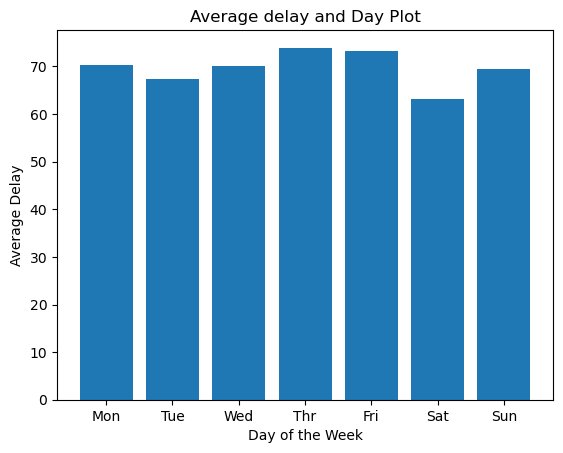

In [4]:
plt.figure(0)
X = ['Mon','Tue','Wed','Thr','Fri','Sat','Sun']
Y = mnDay['ArrDelay']+mnDay['DepDelay']
plt.bar(X, Y)
plt.title('Average delay and Day Plot')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay')
dMin = X[ Y.argmin() ]
dMax = X[ Y.argmax() ]
print(f"Maximum delay on %s and miminum delay on %s. Therefore %s is the best day for a flight." % (dMax, dMin, dMin)) 
plt.show()

In [5]:
DepTime = np.array(dfData.CRSDepTime)
DepDel = np.array(dfData.DepDelay)
ArrDel = np.array(dfData.ArrDelay)

In [6]:
X = np.arange(24)
Y = np.zeros(24)
Hx = np.zeros(24)

In [7]:
hour_bins = DepTime // 100
np.add.at(Hx, hour_bins, 1)
np.add.at(Y, hour_bins, DepDel + ArrDel)

In [8]:
nonzero_counts = Hx != 0
Y[nonzero_counts] /= Hx[nonzero_counts]

Maximum delay on 3 h and miminum delay on 06 h. Therefore 06 h is the best time for a flight.


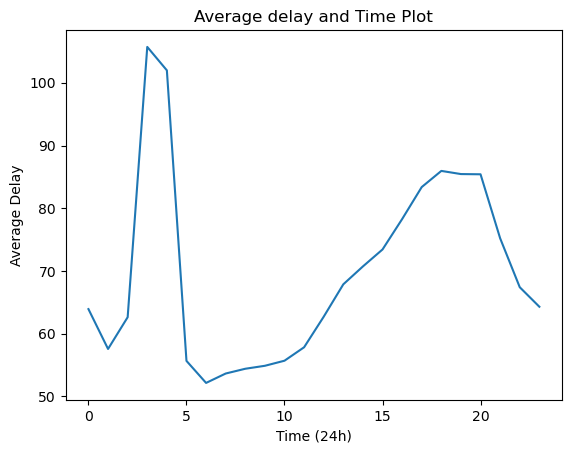

In [9]:
plt.figure(0)
plt.plot(X, Y)
plt.title('Average delay and Time Plot')
plt.xlabel('Time (24h)')
plt.ylabel('Average Delay')
dMin = X[ Y.argmin() ]
dMax = X[ Y.argmax() ]
print(f"Maximum delay on %d h and miminum delay on 0%d h. Therefore 0%d h is the best time for a flight." % (dMax, dMin, dMin)) 
plt.show()